<a href="https://colab.research.google.com/github/ArielaLevkov/ImageProcessing_TA/blob/main/exercises/ImageProcessingEx_01_HistogramEqualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<div dir="rtl">

# מטלה 1 – השוואת היסטוגרמות (Histogram Equalization):

 יש לכתוב בתחילת המחברת את שמות הסטודנטים ומספרי תעודת הזהות בפורמט הבא:

שם פרטי+שם משפחה + ת"ז:

Xxxxx XXXXX, #nnnnnn

<div>



<div dir="rtl">

# השוואת היסטוגרמות:

בתרגיל זה תיישמו את אלגוריתם **השוואת היסטוגרמה (Histogram Equalization)**

**שימו לב**: אין להשתמש בפונקציות מוכנות של עיבוד תמונה
(לדוגמה: numpy.histogram() או כל פונקציה דומה).
עליכם לממש את החישוב בעצמכם, צעד אחר צעד, לפי ההסבר שניתן בשיעור.

**הנחיות כלליות**:

* המטלה בזוגות, במקרה של בקשות אישיות ניתן לשלוח מייל

* כתבו את הקוד שלכם באזורי ה־TODO (האזורים שסומנו לכך מראש).
ניתן להוסיף פונקציות עזר משלכם אם תרצו.

* העלו את הפתרון ללמדה ע"י  הקישור למחברת ה־Colab שלכם
(ממוקמת ב־Google Drive) עם הרשאת “Commenter” לכתובת ariela7870451@gmail.com

* המחברת צריכה להיראות תקינה ולהיות ניתנת להרצה מלאה ע"י הפקודה
“Run all” – ללא שגיאות.
במקרה של שגיאות, ההגשה תיפסל.


* הציון יינתן לפי:
רמת הביצוע הנכונה של האלגוריתם על מספר תמונות בגווני אפור
וניקיון הקוד (תיעוד, הערות, מבנה קריא).

* אל תשכחו להוסיף את שמותיכם ומספרי תעודת הזהות בראש המחברת.

<div>


## Setup Code

<div dir="rtl">

לפני שמתחילים, יש להריץ כמה פקודות הגדרה בסיסיות (boilerplate code) שמכינות את סביבת העבודה.
יש להריץ קטע קוד זה בכל פעם שפותחים מחדש את המחברת, כדי להבטיח שכל הספריות וההגדרות נטענו כראוי.

<div>

In [ ]:
import os
import requests
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
import PIL


In [ ]:
GITHUB_PATH = 'https://raw.githubusercontent.com/ArielaLevkov/ImageProcessing_TA/main/images/'

In [ ]:
def read_file(file_name:str, file_path:str=GITHUB_PATH) -> np.ndarray:
    '''
    Accept an image file name (defaulty located in GitHub) and return the image
    in a numpy array.

    Args:
        file_name: the file name
        file_path: the file path.. Default value is Doron's Github repo.

    Returns:
        the image converted into a Numpy array.
    '''
    file_path = os.path.join(file_path, file_name)
    response = requests.get(file_path)
    fp = BytesIO(response.content)

    img_pil = PIL.Image.open(fp)
    return np.array(img_pil, dtype='int16')

In [ ]:
img = read_file(file_name='house.tiff')

In [ ]:
def plot_img(img: np.array, figsize:(int,int)=None):
    if figsize:
        plt.figure(figsize = figsize)
    plt.imshow(img, cmap='gray', vmin=0, vmax=255)

In [ ]:
plot_img(img)

<div dir="rtl">

#חלק ראשון:

1. הגדר פונקציה שמקבלת תמונת-אפור ומחזירה מערך בגודל 256 של ההיסטוגרמה המצטברת המנורמלת (CDF). (ראו סעיף 3.1 בתרגול 3)

2. בעזרת [1], חשב היסטוגרמות מצטברות מנורמלות (CDF) עבור img_src ועבור img_dest. (לפי התמונות למטה)

3. יישם השוואת היסטוגרמות עם 256 רמות במקום 10  (ראו סעיף 3.5 בתרגול 3) התוצאה היא וקטור מיפוי cv באורך 256.

4. צור img_new ריקה (מלאה באפסים) בגודל זהה ל־img_src.

5. עבור על כל הפיקסלים וקבע לכל פיקסל את הערך החדש שלו לפי השוואת ההיסטוגרמות:  img_new[r, c] = cv[ img_src[r, c] ].

**התוצאה צריכה להיות זהה ל img_new  שבתמונה למטה**
<div>

In [ ]:
img_src = read_file(file_name='darkimage.tiff')
plot_img(img_src)

In [ ]:
img_dest = read_file(file_name='flatHistShape.tiff')
plot_img(img_dest)

In [ ]:
def hist_shape(img_src: np.array, img_dest: np.array) -> np.array:
    '''
    This function perform an grayscale image enhancement using Histogram
    Equalization.
    Args:
        img_src: image in int16 format - the image to enhance
        img_dest: image in int16 format - the histogram will be based on it.

    Returns:
        img_new: Returned image, in int16 format - the enhanced image
    '''

    ######################################################################
    # TODO: Implement image enhancement using histogram Equalization.
    ######################################################################

    # Replace "pass" statement with your code
    pass
    ######################################################################
    #                            END OF YOUR CODE                        #
    ######################################################################

    return img_new

In [ ]:
img_new = hist_shape(img_src, img_dest)
plot_img(img_new)

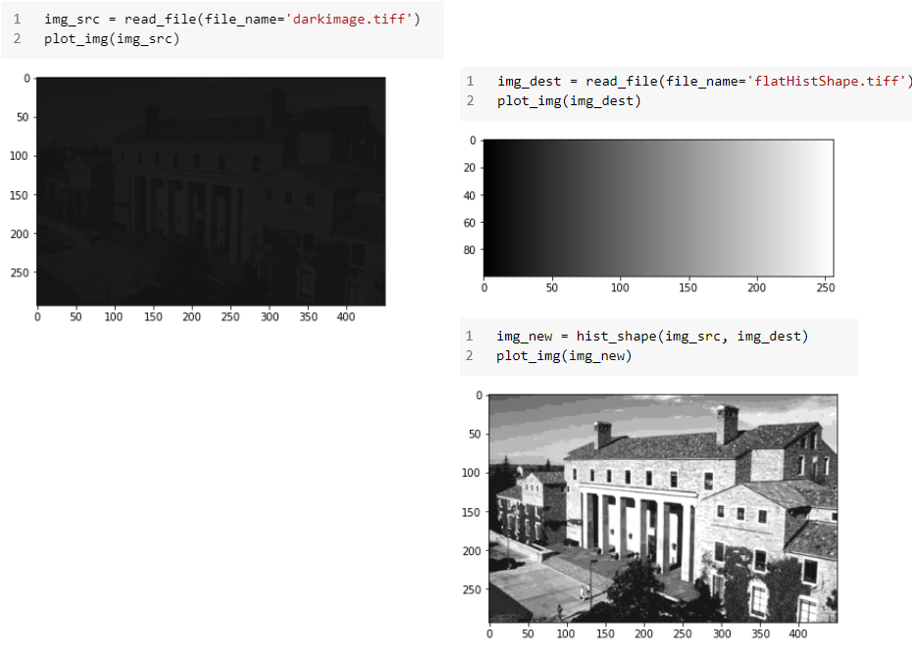

<div dir="rtl">

#חלק שני:

כעת תקבלו כקלט תמונה אחת גדולה (1140,750) ותמונה אחת מוקטנת (38,25)

המטרה היא לבנות תמונה חדשה (img_new) בגודל של התמונה הגדולה (img_big), המורכבת מהרבה עותקים קטנים של התמונה הקטנה (img_small).
כל עותק (אריח) מותאם מבחינת בהירות וניגודיות לאזור המתאים בתמונה הגדולה בעזרת השוואת היסטוגרמות (hist_shape):

1. חלק את התמונה הגדולה לבלוקים בגודל של התמונה הקטנה

2. עבור כל בלוק חשב היסטוגרמות מצטברות מנורמלות (CDF)

3. השתמש ב־hist_shape כדי להתאים את רמות האפור של (img_small) לאותו אזור

4. לא לשכוח לשים את ה־tile במקום הנכון בתוך img_new:

<div>
img_new[r:r+tile_h, c:c+tile_w] = tile

<div dir="rtl">

**התוצאה:**
תמונה גדולה של מוצרט, שמורכבת מהמון “מוצרטים קטנים”.
בכל אזור, רמת הבהירות של האריח הקטן מותאמת לאור ולצל באותו אזור בתמונה המקורית וכך אפשר לזהות את התמונה הגדולה בבירור.

<div>


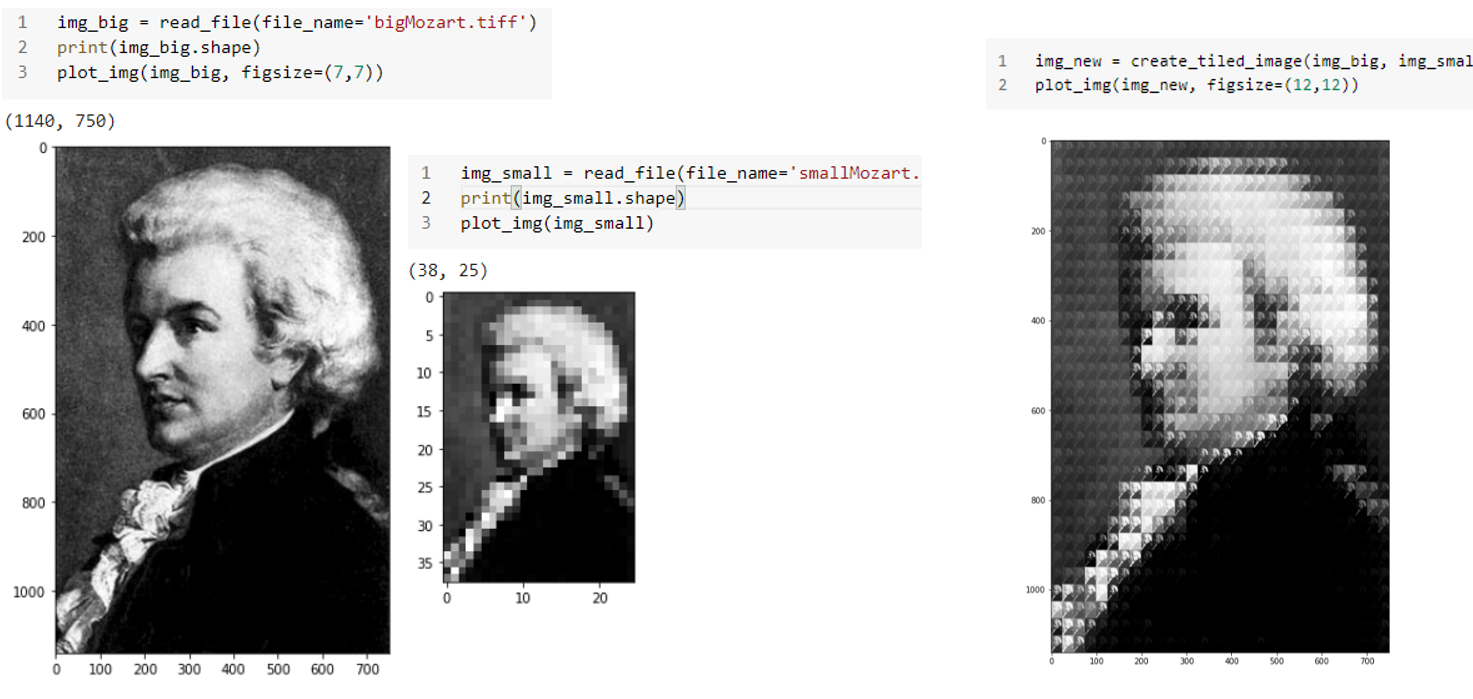

In [ ]:
def create_tiled_image(img_big: np.array, img_small: np.array) -> np.array:
    '''
    This function receives 2 grayscale image (matrix of int16, values:0..255) and
    creates a new image. The new image consists of tiles of the small image
    which forms the big image. Each of the small image tiles is processed using
    the histShape function to match the histogram of the big image in the same
    location.
    Args:
        img_big: image in int16 format - the image to enhance
        img_small: image in int16 format - the histogram will be based on it.

    Returns:
        img_new: returned image, in int16 format - the tiled image
    '''

    ######################################################################
    # TODO: Implement tiles image using histogram Equalization.
    ######################################################################

    # Replace "pass" statement with your code
    pass
    ######################################################################
    #                            END OF YOUR CODE                        #
    ######################################################################

    return img_new

In [ ]:
img_big = read_file(file_name='bigMozart.tiff')
plot_img(img_big, figsize=(7,7))

In [ ]:
img_small = read_file(file_name='smallMozart.tiff')
plot_img(img_small)

In [ ]:
img_new = create_tiled_image(img_big, img_small)
plot_img(img_new, figsize=(12,12))